In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(f"E:\Data Science Material\EDA & Feature Engineering\data\Cleaned_playstore_data.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [6]:
df.shape

(10840, 13)

### **Methods to check & plot missing values**

In [17]:
null_data = pd.DataFrame({"% of null values" : round(df.isna().sum().sort_values(ascending=False)/df.shape[0]*100, 2),
              "The count of null values" : df.isna().sum().sort_values(ascending=False)})

In [18]:
null_data

,% of null values,The count of null values
Size,15.64,1695
Rating,13.60,1474
Current Ver,0.07,8
Android Ver,0.02,2
Type,0.01,1
App,0.00,0
Category,0.00,0
Reviews,0.00,0
Installs,0.00,0
Price,0.00,0


In [20]:
null_data.index

Index(['Size', 'Rating', 'Current Ver', 'Android Ver', 'Type', 'App',
       'Category', 'Reviews', 'Installs', 'Price', 'Content Rating', 'Genres',
       'Last Updated'],
      dtype='object')

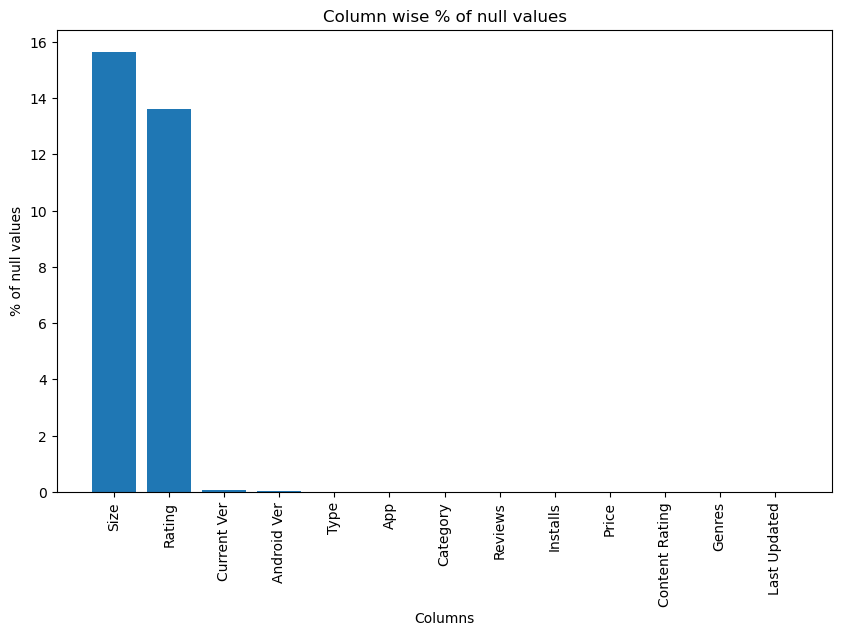

In [32]:
plt.figure(figsize=(10, 6))
plt.xticks(np.arange(len(null_data['% of null values'])), null_data.index, rotation = 90)
plt.bar(np.arange(len(null_data['% of null values'])), null_data['% of null values'])
plt.ylabel("% of null values")
plt.xlabel("Columns")
plt.title("Column wise % of null values")
plt.show()

In [33]:
df_copy = df.copy()

In [41]:
df_copy.isna().sum().sort_values(ascending=False)

Size              1695
Rating            1474
Current Ver          8
Android Ver          2
Type                 1
App                  0
Category             0
Reviews              0
Installs             0
Price                0
Content Rating       0
Genres               0
Last Updated         0
dtype: int64

In [43]:
null_cols = [i for i in df_copy.columns if df_copy[i].isna().sum() > 0]
null_cols

['Rating', 'Size', 'Type', 'Current Ver', 'Android Ver']

### **Methods to handle missing values**

**1) Drop the missing values**

In [44]:
drop_df = df_copy[null_cols].dropna()
drop_df.shape, df_copy.shape

((7723, 5), (10840, 13))

### **Check density plot of the null columns before & after dropping missing values**

<Figure size 640x480 with 0 Axes>

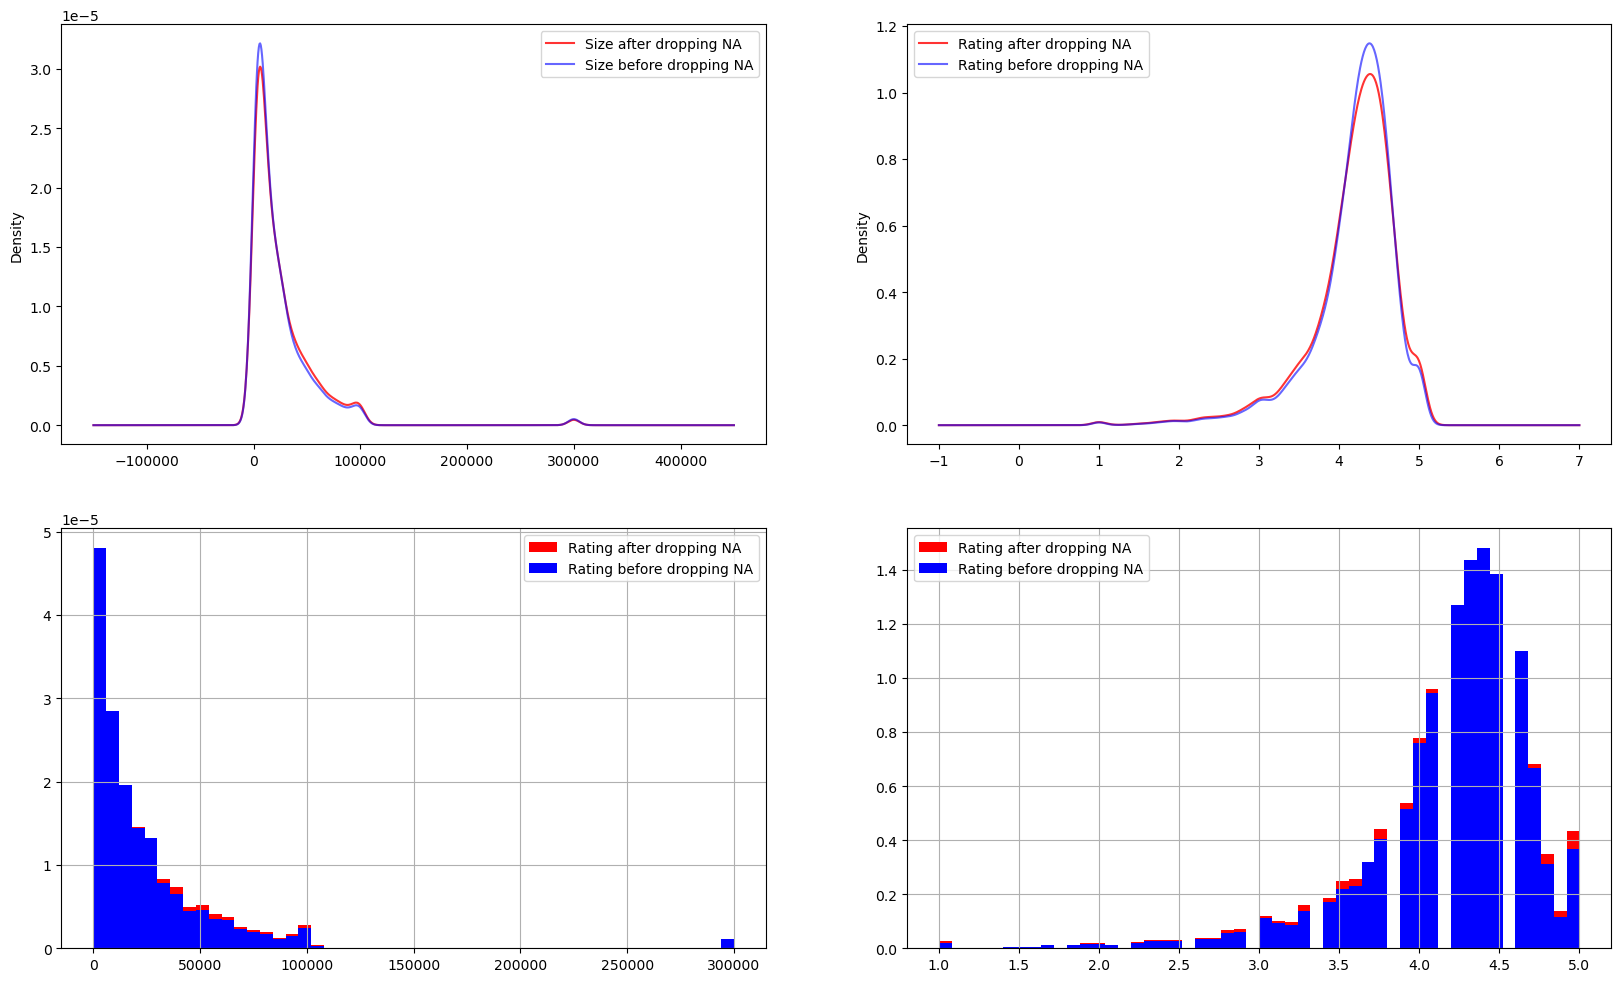

In [63]:
plt.figure()

fig, ax = plt.subplots(2,2,figsize = (20, 12))

drop_df['Size'].plot.density(color = 'red', ax = ax[0,0], alpha = 0.8, label = 'Size after dropping NA')
df_copy['Size'].plot.density(color = 'blue', ax = ax[0,0], alpha = 0.6, label = 'Size before dropping NA')
ax[0, 0].legend()

drop_df['Rating'].plot.density(color = 'red', ax = ax[0,1], alpha = 0.8, label = 'Rating after dropping NA')
df_copy['Rating'].plot.density(color = 'blue', ax = ax[0,1], alpha = 0.6, label = 'Rating before dropping NA')
ax[0, 1].legend()

drop_df['Size'].hist(bins=50, ax=ax[1,0], density = True, color = 'red', label = 'Rating after dropping NA')
df_copy['Size'].hist(bins=50, ax=ax[1,0], density = True, color = 'blue', label = 'Rating before dropping NA')
ax[1,0].legend()

drop_df['Rating'].hist(bins=50, ax=ax[1,1], density = True, color = 'red', label = 'Rating after dropping NA')
df_copy['Rating'].hist(bins=50, ax=ax[1,1], density = True, color = 'blue',label = 'Rating before dropping NA')
ax[1,1].legend()

plt.show()

So here the dropping missing values will impact in the distribution of the columns so we have to reject this technique.

### **Mean/Median/Mode Imputation**

In [64]:
df_mean_median = df.copy()

In [70]:
df_mean_median['Size'].mean(), df_mean_median['Size'].median()

(24013.15570256971, 13312.0)

In [65]:
df_mean_median['Mean_Size'] = df_mean_median['Size'].fillna(df_mean_median['Size'].mean())
df_mean_median['Median_Size'] = df_mean_median['Size'].fillna(df_mean_median['Size'].median())

df_mean_median['Mean_rating'] = df_mean_median['Rating'].fillna(df_mean_median['Rating'].mean())
df_mean_median['Median_rating'] = df_mean_median['Rating'].fillna(df_mean_median['Rating'].median())

In [67]:
df_mean_median.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Mean_Size,Median_Size,Mean_rating,Median_rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,19456.0,19456.0,4.1,4.1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,14336.0,14336.0,3.9,3.9
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,8908.8,8908.8,4.7,4.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,25600.0,25600.0,4.5,4.5
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2867.2,2867.2,4.3,4.3


In [72]:
print(f"Size column original variance is: {df_mean_median['Size'].std()}")
print(f"Size column variance after mean imputation is: {df_mean_median['Mean_Size'].std()}")
print(f"Size column variance after median imputation  is: {df_mean_median['Median_Size'].std()}")

Size column original variance is: 32313.71198488686
Size column variance after mean imputation is: 29679.75764395863
Size column variance after median imputation  is: 29933.18629414769


In [73]:
print(f"Rating column original variance is: {df_mean_median['Rating'].std()}")
print(f"Rating column variance after mean imputation is: {df_mean_median['Mean_rating'].std()}")
print(f"Rating column variance after median imputation  is: {df_mean_median['Median_rating'].std()}")

Rating column original variance is: 0.5152188586177886
Rating column variance after mean imputation is: 0.47890683335928824
Rating column variance after median imputation  is: 0.48034198612398077


So we are able to reduce the standard deviation of size & rating column by imputing mean in the missing value.

<Figure size 640x480 with 0 Axes>

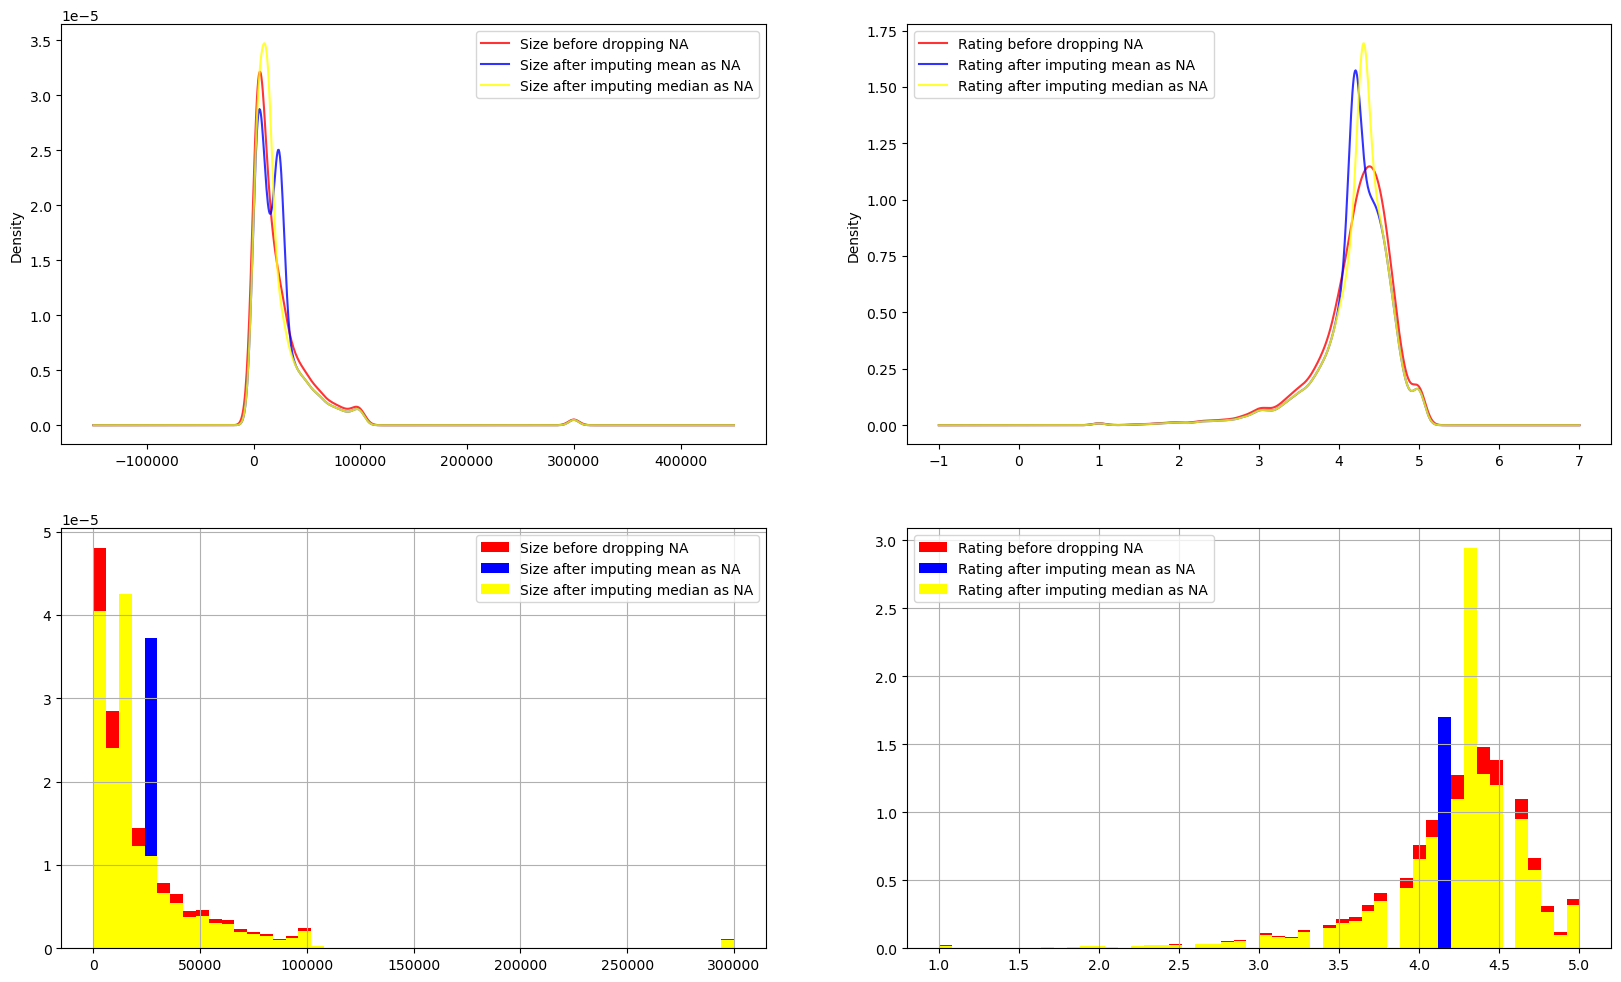

In [77]:
plt.figure()

fig, ax = plt.subplots(2,2,figsize = (20, 12))

df_mean_median['Size'].plot.density(color = 'red', ax = ax[0,0], alpha = 0.8, label = 'Size before dropping NA')
df_mean_median['Mean_Size'].plot.density(color = 'blue', ax = ax[0,0], alpha = 0.8, label = 'Size after imputing mean as NA')
df_mean_median['Median_Size'].plot.density(color = 'yellow', ax = ax[0,0], alpha = 0.8, label = 'Size after imputing median as NA')
ax[0, 0].legend()

df_mean_median['Rating'].plot.density(color = 'red', ax = ax[0,1], alpha = 0.8, label = 'Rating before dropping NA')
df_mean_median['Mean_rating'].plot.density(color = 'blue', ax = ax[0,1], alpha = 0.8, label = 'Rating after imputing mean as NA')
df_mean_median['Median_rating'].plot.density(color = 'yellow', ax = ax[0,1], alpha = 0.8, label = 'Rating after imputing median as NA')
ax[0, 1].legend()

df_mean_median['Size'].hist(bins=50, ax=ax[1,0], density = True, color = 'red', label = 'Size before dropping NA')
df_mean_median['Mean_Size'].hist(bins=50, ax=ax[1,0], density = True, color = 'blue', label = 'Size after imputing mean as NA')
df_mean_median['Median_Size'].hist(bins=50, ax=ax[1,0], density = True, color = 'yellow', label = 'Size after imputing median as NA')
ax[1,0].legend()

df_mean_median['Rating'].hist(bins=50, ax=ax[1,1], density = True, color = 'red', label = 'Rating before dropping NA')
df_mean_median['Mean_rating'].hist(bins=50, ax=ax[1,1], density = True, color = 'blue', label = 'Rating after imputing mean as NA')
df_mean_median['Median_rating'].hist(bins=50, ax=ax[1,1], density = True, color = 'yellow', label = 'Rating after imputing median as NA')
ax[1,1].legend()

plt.show()

- Mean, Median imputation is also changing the distribution of the columns.
- so we should not use this technique also.

### **Random Sample Imputation**

In [78]:
df_random = df.copy()

In [93]:
def random_imputation(df, feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum()) # first take random samples of missing value size
    random_sample.index = df[df[feature].isna()].index # assign missing value indexes to random sample indexes
    df.loc[df[feature].isna(), feature] = random_sample # insert random samples in the place of that column missing values

In [97]:
for col in df_random:
    random_imputation(df_random, col)

In [100]:
print(f"Original standard deviation of Size column is: {round(df['Size'].std(),2)}")
print(f"Standard deviation of Size column after random imputation is: {round(df_random['Size'].std(), 2)}")

Original standard deviation of Size column is: 32313.71
Standard deviation of Size column after random imputation is: 32309.11


<Figure size 640x480 with 0 Axes>

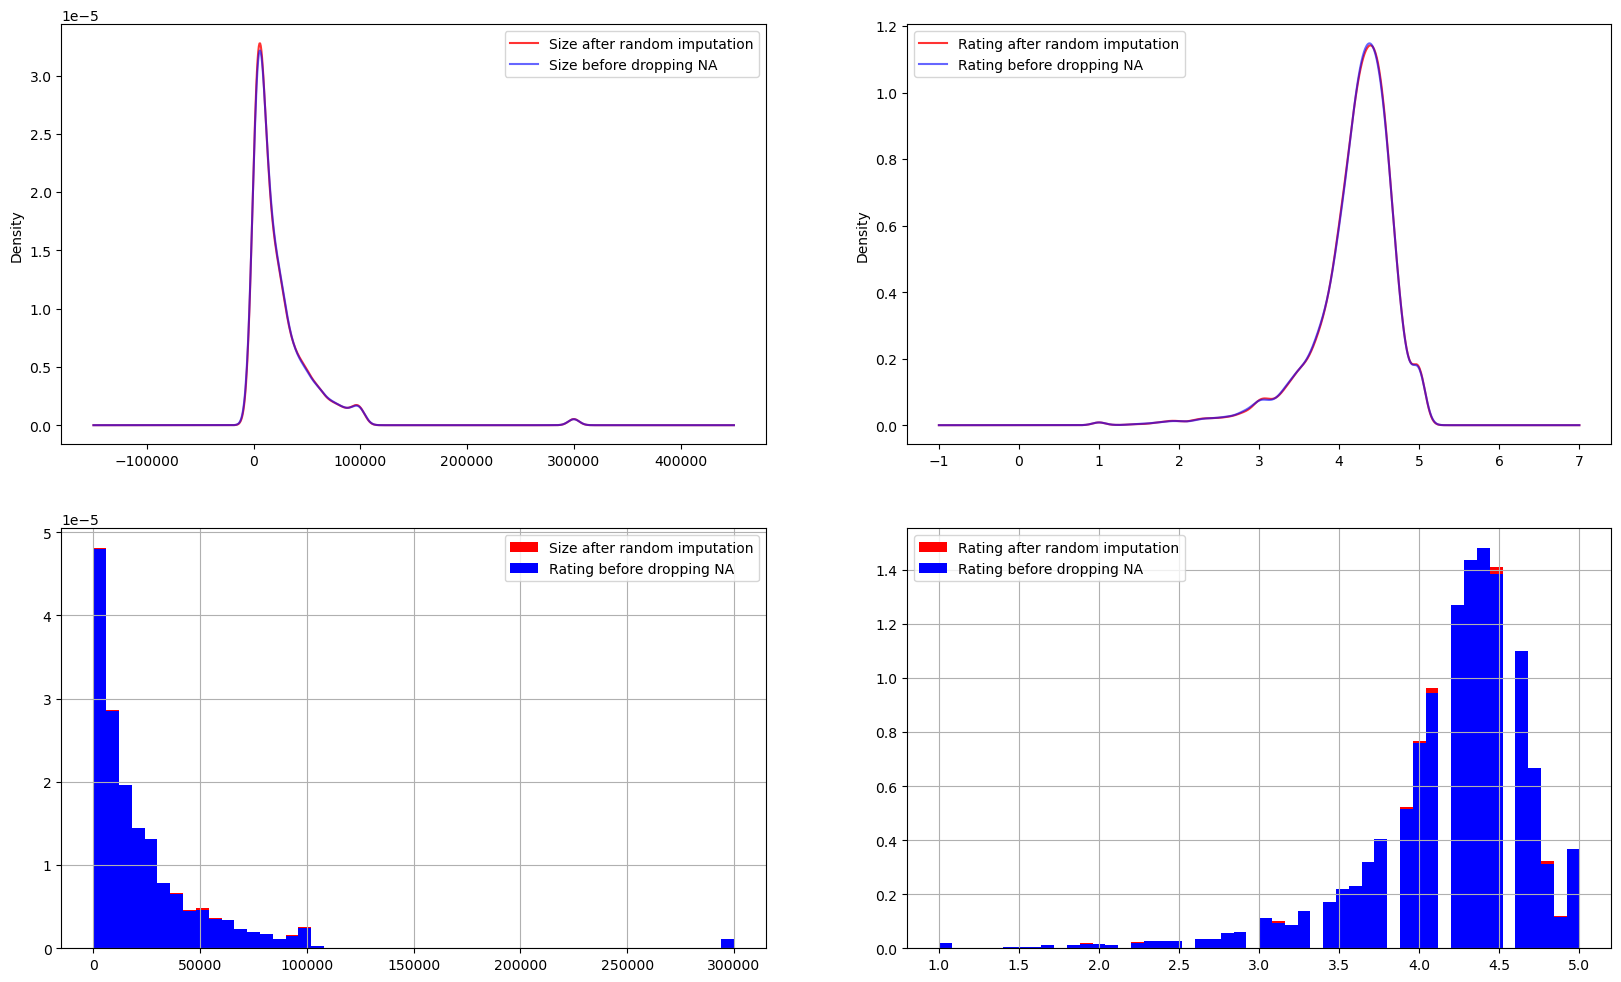

In [101]:
plt.figure()

fig, ax = plt.subplots(2,2,figsize = (20, 12))

df_random['Size'].plot.density(color = 'red', ax = ax[0,0], alpha = 0.8, label = 'Size after random imputation')
df['Size'].plot.density(color = 'blue', ax = ax[0,0], alpha = 0.6, label = 'Size before dropping NA')
ax[0, 0].legend()

df_random['Rating'].plot.density(color = 'red', ax = ax[0,1], alpha = 0.8, label = 'Rating after random imputation')
df['Rating'].plot.density(color = 'blue', ax = ax[0,1], alpha = 0.6, label = 'Rating before dropping NA')
ax[0, 1].legend()

df_random['Size'].hist(bins=50, ax=ax[1,0], density = True, color = 'red', label = 'Size after random imputation')
df['Size'].hist(bins=50, ax=ax[1,0], density = True, color = 'blue', label = 'Rating before dropping NA')
ax[1,0].legend()

df_random['Rating'].hist(bins=50, ax=ax[1,1], density = True, color = 'red', label = 'Rating after random imputation')
df['Rating'].hist(bins=50, ax=ax[1,1], density = True, color = 'blue',label = 'Rating before dropping NA')
ax[1,1].legend()

plt.show()

Here after random imputation the columns are not changing their distribution so this will be a better method for handling missing values.

In [102]:
pd.DataFrame({"% of null values" : round(df_random.isna().sum().sort_values(ascending=False)/df_random.shape[0]*100, 2),
              "The count of null values" : df_random.isna().sum().sort_values(ascending=False)})

,% of null values,The count of null values
App,0.0,0
Category,0.0,0
Rating,0.0,0
Reviews,0.0,0
Size,0.0,0
Installs,0.0,0
Type,0.0,0
Price,0.0,0
Content Rating,0.0,0
Genres,0.0,0


In [103]:
df_random.to_csv("./data/playstore_missing_value_handled_data.csv", index=False)